In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from datetime import datetime

%matplotlib inline
# %pylab inline
# %config InlineBackend.figure_format = 'retina'
# from ipywidgets import interact
# import scipy
# import scipy.special

# General

(c) Junqui Liu and Carlos Contreras, January 2021

In [2]:
data = pd.read_csv('../../data/AHS Public/covid19dataexport.csv')
data['Date reported'] = pd.to_datetime(data['Date reported'], format='%Y-%m-%d')

In [3]:
data.head()

,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2021-01-03,Calgary Zone,Female,5-9 years,Recovered,Confirmed
2,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
3,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed
4,2021-01-20,Edmonton Zone,Female,Under 1 year,Active,Confirmed


In [4]:
data.shape

(122360, 6)

This data set contains 105535 patients and 6 features (as of January 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122360 entries, 0 to 122359
Data columns (total 6 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date reported                 122360 non-null  datetime64[ns]
 1   Alberta Health Services Zone  122360 non-null  object        
 2   Gender                        122360 non-null  object        
 3   Age group                     122360 non-null  object        
 4   Case status                   122360 non-null  object        
 5   Case type                     122360 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 5.6+ MB


In [6]:
data.describe(include = [object])

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,122360,122360,122360,122360,122360
unique,6,3,12,3,2
top,Edmonton Zone,Female,30-39 years,Recovered,Confirmed
freq,50990,61160,23194,112558,120928


In [7]:
data.dtypes

Date reported                   datetime64[ns]
Alberta Health Services Zone            object
Gender                                  object
Age group                               object
Case status                             object
Case type                               object
dtype: object

The following are the possible values for each feature

In [8]:
data['Alberta Health Services Zone'].unique()

array(['Calgary Zone', 'Edmonton Zone', 'Central Zone', 'North Zone',
       'South Zone', 'Unknown'], dtype=object)

In [9]:
data['Age group'].unique()

array(['1-4 years', '5-9 years', '50-59 years', 'Under 1 year',
       '30-39 years', '10-19 years', '40-49 years', '20-29 years',
       '60-69 years', '80+ years', '70-79 years', 'Unknown'], dtype=object)

In [10]:
data['Case status'].unique()

array(['Recovered', 'Active', 'Died'], dtype=object)

In [11]:
data['Case type'].unique()

array(['Confirmed', 'Probable'], dtype=object)

Using only the confirmed cases, 120928 cases af of January 26.

Confirmed    120928
Probable       1432
Name: Case type, dtype: int64

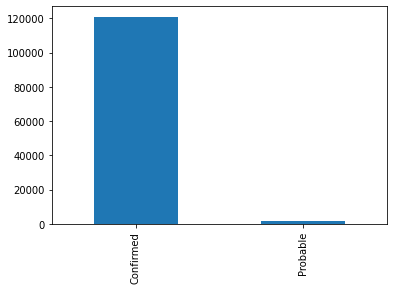

In [12]:
data['Case type'].value_counts().plot.bar()
data['Case type'].value_counts()

In [13]:
df = data[data['Case type']=='Confirmed']

In [14]:
df.head(8)

,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
0,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
1,2021-01-03,Calgary Zone,Female,5-9 years,Recovered,Confirmed
2,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
3,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed
4,2021-01-20,Edmonton Zone,Female,Under 1 year,Active,Confirmed
5,2020-12-09,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
6,2020-12-06,Central Zone,Female,10-19 years,Recovered,Confirmed
7,2021-01-14,Calgary Zone,Female,40-49 years,Active,Confirmed


In [94]:
df.sort_values('Date reported').tail(5)

,Date reported,Alberta Health Services Zone,Gender,Age group,Case status,Case type
34235,2021-01-26,Central Zone,Male,40-49 years,Active,Confirmed
11057,2021-01-26,Calgary Zone,Female,70-79 years,Active,Confirmed
74810,2021-01-26,Calgary Zone,Female,60-69 years,Active,Confirmed
67446,2021-01-26,Calgary Zone,Female,60-69 years,Active,Confirmed
87428,2021-01-26,North Zone,Female,5-9 years,Active,Confirmed


In [95]:
df.describe(include='object')

,Alberta Health Services Zone,Gender,Age group,Case status,Case type
count,120928,120928,120928,120928,120928
unique,6,3,12,3,1
top,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
freq,50675,60470,22977,111174,120928


# Charts

,Count,Percentage
Recovered,111174,91.93
Active,8157,6.75
Died,1597,1.32


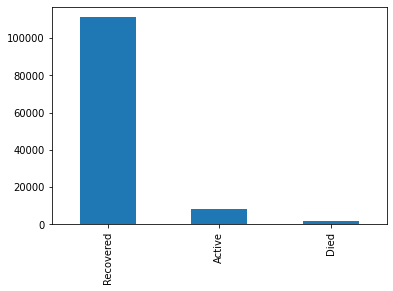

In [96]:
temp = df['Case status'].value_counts()
temp.plot.bar()
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

,Count,Percentage
Male,60470,50.00
Female,60436,49.98
Unknown,22,0.02


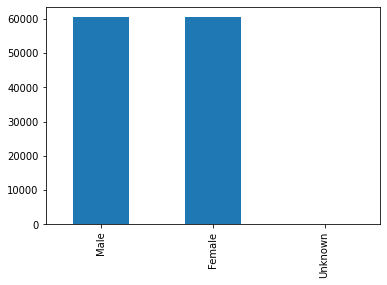

In [97]:
temp = df['Gender'].value_counts()
temp.plot.bar()
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

,Count,Percentage
Edmonton Zone,50675,41.91
Calgary Zone,46292,38.28
North Zone,9827,8.13
Central Zone,8598,7.11
South Zone,5438,4.50
Unknown,98,0.08


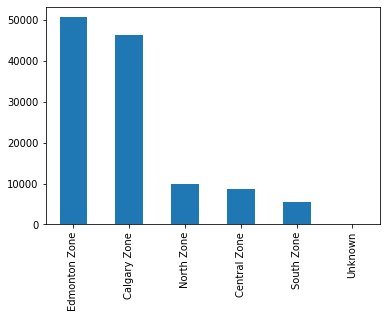

In [98]:
temp = df['Alberta Health Services Zone'].value_counts()
temp.plot.bar()
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

,Count,Percentage
Recovered,111174,91.93
Active,8157,6.75
Died,1597,1.32


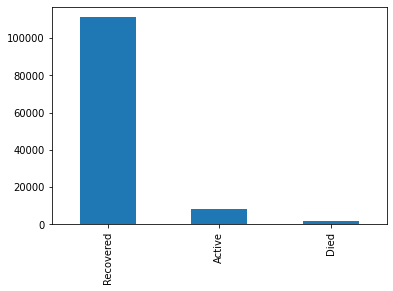

In [99]:
temp = df['Case status'].value_counts()
temp.plot.bar()
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

In [100]:
ageix = ['Under 1 year', '1-4 years', '5-9 years', '10-19 years',
     '20-29 years', '30-39 years', '40-49 years', '50-59 years',
     '60-69 years', '70-79 years', '80+ years', 'Unknown']

,Count,Percentage
Under 1 year,636,0.53
1-4 years,3640,3.01
5-9 years,5154,4.26
10-19 years,13908,11.50
20-29 years,22435,18.55
30-39 years,22977,19.00
40-49 years,19114,15.81
50-59 years,14434,11.94
60-69 years,8984,7.43
70-79 years,4495,3.72


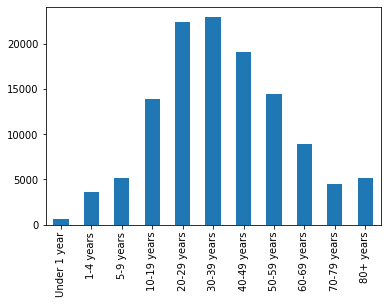

In [101]:
temp = df['Age group'].value_counts()
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
pd.DataFrame({'Count':temp, 'Percentage':(temp/len(df)*100).round(2)})

Age distribution is pretty much normal

Gender,Female,Male,Unknown
Age group,,,
Under 1 year,305.0,331.0,NaN
1-4 years,1799.0,1840.0,1.0
5-9 years,2424.0,2730.0,NaN
10-19 years,6811.0,7089.0,8.0
20-29 years,11044.0,11383.0,8.0
30-39 years,11313.0,11663.0,1.0
40-49 years,9631.0,9482.0,1.0
50-59 years,7255.0,7178.0,1.0
60-69 years,4362.0,4621.0,1.0


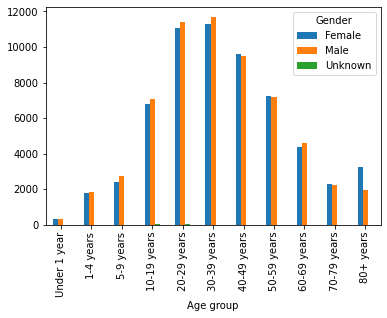

In [102]:
temp = df.groupby('Gender')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
temp

There is an important gender difference in the number of cases of elderly people.

Gender,Female,Male
Case status,,
Active,4043.0,4111.0
Died,721.0,876.0
Recovered,55672.0,55483.0


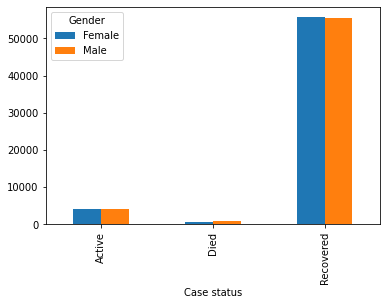

In [23]:
temp = df.groupby('Gender')['Case status'].value_counts().unstack(0)
temp = temp.drop(['Unknown'],axis=1)
temp.plot.bar()
temp

Alberta Health Services Zone,Calgary Zone,Central Zone,Edmonton Zone,North Zone,South Zone
Age group,,,,,
Under 1 year,0.005207,0.006048,0.004973,0.006207,0.005517
1-4 years,0.028258,0.031752,0.030609,0.036736,0.027032
5-9 years,0.041675,0.051291,0.041957,0.048540,0.033100
10-19 years,0.111738,0.141312,0.108839,0.134833,0.123759
20-29 years,0.187915,0.177716,0.186201,0.177776,0.181868
30-39 years,0.197982,0.165736,0.191766,0.169024,0.181317
40-49 years,0.169918,0.139916,0.151428,0.147553,0.167709
50-59 years,0.118716,0.121191,0.119062,0.119263,0.126149
60-69 years,0.070128,0.086881,0.074303,0.081815,0.076499


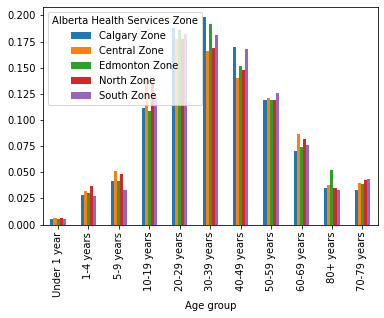

In [24]:
temp = df.groupby('Alberta Health Services Zone')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp = temp.drop(['Unknown'],axis=1)
temp = temp.div(temp.sum(), axis=1)
temp.plot.bar()
temp

Gender,Female,Male
Age group,,
Under 1 year,NaN,NaN
1-4 years,NaN,NaN
5-9 years,NaN,NaN
10-19 years,NaN,NaN
20-29 years,5.0,2.0
30-39 years,2.0,5.0
40-49 years,5.0,12.0
50-59 years,16.0,34.0
60-69 years,65.0,96.0


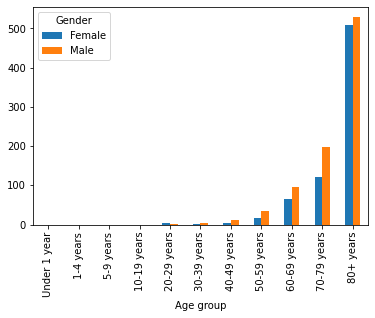

In [103]:
temp = df[df['Case status']=='Died'].groupby('Gender')['Age group'].value_counts().unstack(0)
temp = temp.reindex(index=ageix)
temp = temp.drop(['Unknown'],axis=0)
temp.plot.bar()
temp

That is a significant age and sex difference in the number of deaths. Old man are at higher risk.

# TimeSeries

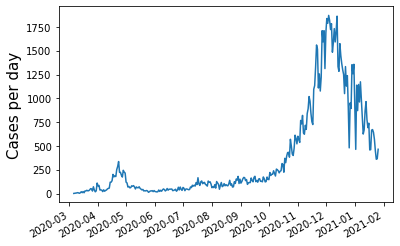

In [25]:
temp = df['Date reported'].value_counts()
temp.plot()
plt.ylabel('Cases per day', fontsize=15);

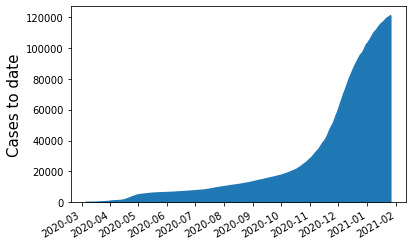

In [66]:
temp = df['Date reported'].value_counts().sort_index().cumsum()
temp.plot.area()
plt.ylabel('Cases to date', fontsize=15);

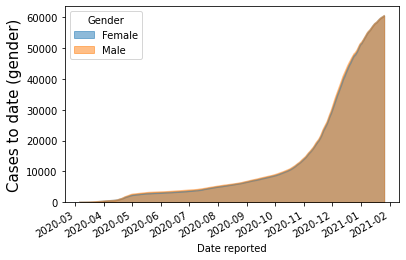

In [77]:
temp = df.groupby('Gender')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum()
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(stacked=False)
plt.ylabel('Cases to date (gender)', fontsize=15);

The age difference is not evident in the number of cases.

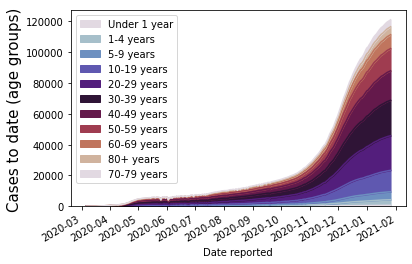

In [78]:
temp = df.groupby('Age group')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum()
temp = temp.reindex(columns=ageix)
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(colormap=plt.get_cmap('twilight'))
plt.legend(loc=2)
plt.ylabel('Cases to date (age groups)', fontsize=15);

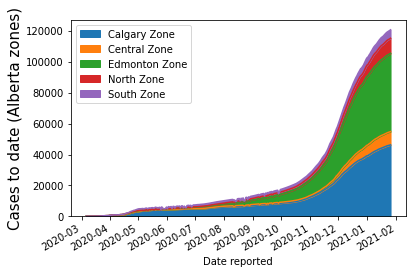

In [79]:
temp = df.groupby('Alberta Health Services Zone')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().cumsum()
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area()
plt.legend(loc=2)
plt.ylabel('Cases to date (Alberta zones)', fontsize=15);

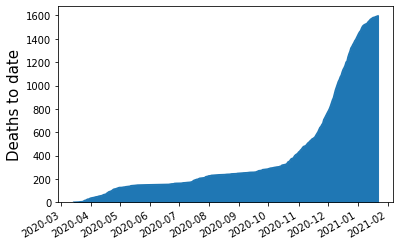

In [83]:
temp = df[df['Case status']=='Died']['Date reported']
temp = temp.value_counts().sort_index().cumsum()
temp.plot.area()
plt.ylabel('Deaths to date', fontsize=15);

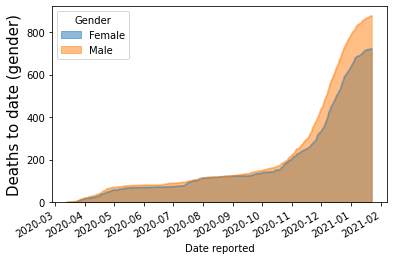

In [84]:
temp = df[df['Case status']=='Died'].groupby('Gender')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum()
temp.plot.area(stacked=False)
plt.ylabel('Deaths to date (gender)', fontsize=15);

The age difference is evident in the number of deaths.

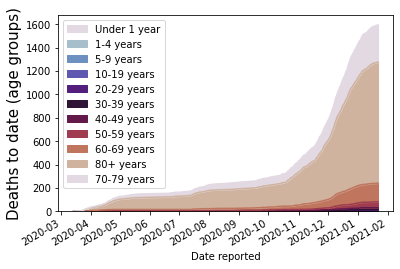

In [86]:
temp = df[df['Case status']=='Died'].groupby('Age group')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum()
temp = temp.reindex(columns=ageix)
temp = temp.drop(['Unknown'], axis=1)
temp.plot.area(colormap=plt.get_cmap('twilight'))
plt.legend(loc=2)
plt.ylabel('Deaths to date (age groups)', fontsize=15);

The risk to elderly people is outstanding.

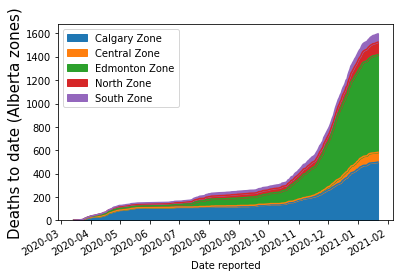

In [89]:
temp = df[df['Case status']=='Died'].groupby('Alberta Health Services Zone')['Date reported']
temp = temp.value_counts().unstack(0).sort_index().fillna(0).cumsum()
temp.plot.area()
plt.legend(loc=2)
plt.ylabel('Deaths to date (Alberta zones)', fontsize=15);